# Pyspark

In [1]:
!pip install pyspark

### SparkContext

In PySpark, `SparkContext` is the entry point to interact with Apache Spark. It represents the connection to a Spark cluster, enabling communication between the application and the cluster to perform distributed data processing.

Here’s what it does and why it’s important:

__Core of PySpark__: `SparkContext` allows your PySpark program to interact with the Spark cluster, enabling operations like reading data, transforming it, and saving results.

__Driver Program__: When a Spark job runs, the SparkContext acts as a driver program, coordinating the execution of parallel operations across the cluster.

__RDD Creation__: It is used to create RDDs (Resilient Distributed Datasets), which are the basic distributed data structures in Spark for performing operations.

__Cluster Management__: It helps manage and control the cluster resources, ensuring that tasks are distributed across worker nodes.  

### SQLContext
`SQLContext` in PySpark is a class that was used to work with structured data before the introduction of SparkSession in Spark 2.0. It was designed to provide access to SQL-like functionality in Spark, allowing users to create and query DataFrames.

### `SQLContext` and `SparkSession`  
Starting from Spark 2.0, SparkSession replaced SQLContext as the main entry point for working with DataFrames and SQL. In fact, SparkSession integrates SQLContext functionality and more, making it a more unified and efficient API.  

### `from pyspark.sql import *`

When you use this **_wildcard import_**, it brings in many classes and functions, including:

- __SparkSession__: The main entry point for DataFrame and SQL functionality.
- __SQLContext__: An older entry point for working with structured data.
- __DataFrame__: A distributed collection of data organized into named columns.
- __Row__: A class representing a row in a DataFrame.
- __DataFrameReader__: For reading data from external sources into a DataFrame.
- __DataFrameWriter__: For writing DataFrame data to external storage systems.
- __functions__: A module with built-in SQL functions like col, lit, etc.

In [43]:
from pyspark import SparkContext
from pyspark.sql import SQLContext
from pyspark.sql import *
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
sc = SparkContext()
sqlc = SQLContext(sc)
# need to run just once. running again throws an error

24/10/23 17:13:47 WARN Utils: Your hostname, htetaunglynn-XPS-13-9310 resolves to a loopback address: 127.0.1.1; using 192.168.1.108 instead (on interface wlp0s20f3)
24/10/23 17:13:47 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
24/10/23 17:13:48 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
/home/htetaunglynn/anaconda3/lib/python3.11/site-packages/pyspark/sql/context.py:113: FutureWarning: Deprecated in 3.0.0. Use SparkSession.builder.getOrCreate() instead.
  warnings.warn(


In [3]:
na_schema = Row("Name","Age")

In [4]:
row1 = na_schema("Ankit", 23) 
row2 = na_schema("Tyler", 26)
row3 = na_schema("Preity", 36)

In [5]:
na_list = [row1, row2, row3]
df_na = sqlc.createDataFrame(na_list)
type(df_na)

pyspark.sql.dataframe.DataFrame

In [6]:
df_na.show()

+------+---+
|  Name|Age|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



In [7]:
data = [("Ankit",23),("Tyler",26),("Preity",36)]
data_rdd = sc.parallelize(data)
type(data_rdd)

data_sd = sqlc.createDataFrame(data_rdd)
data_sd.show()

+------+---+
|    _1| _2|
+------+---+
| Ankit| 23|
| Tyler| 26|
|Preity| 36|
+------+---+



install this package pyspark –packages com.databricks:spark-csv_2.10:1.4.0

In [8]:
!rm iris.csv

In [10]:
df = sqlc.read.format('csv') \
            .options(header='true', inferschema='true') \
            .load('iris.csv')
type(df)

pyspark.sql.dataframe.DataFrame

In [11]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [12]:
df.toPandas() # change to pandas dataframe

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [13]:
df.toPandas().to_csv('iris_export.csv')

In [14]:
df.printSchema()

root
 |-- sepal_length: double (nullable = true)
 |-- sepal_width: double (nullable = true)
 |-- petal_length: double (nullable = true)
 |-- petal_width: double (nullable = true)
 |-- species: string (nullable = true)



In [15]:
df.schema.names

['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'species']

In [16]:
df.count()

150

In [17]:
len(df.columns)

5

In [18]:
df.show()

+------------+-----------+------------+-----------+-------+
|sepal_length|sepal_width|petal_length|petal_width|species|
+------------+-----------+------------+-----------+-------+
|         5.1|        3.5|         1.4|        0.2| setosa|
|         4.9|        3.0|         1.4|        0.2| setosa|
|         4.7|        3.2|         1.3|        0.2| setosa|
|         4.6|        3.1|         1.5|        0.2| setosa|
|         5.0|        3.6|         1.4|        0.2| setosa|
|         5.4|        3.9|         1.7|        0.4| setosa|
|         4.6|        3.4|         1.4|        0.3| setosa|
|         5.0|        3.4|         1.5|        0.2| setosa|
|         4.4|        2.9|         1.4|        0.2| setosa|
|         4.9|        3.1|         1.5|        0.1| setosa|
|         5.4|        3.7|         1.5|        0.2| setosa|
|         4.8|        3.4|         1.6|        0.2| setosa|
|         4.8|        3.0|         1.4|        0.1| setosa|
|         4.3|        3.0|         1.1| 

In [19]:
df.describe().show()

24/10/23 17:14:13 WARN SparkStringUtils: Truncated the string representation of a plan since it was too large. This behavior can be adjusted by setting 'spark.sql.debug.maxToStringFields'.


+-------+------------------+-------------------+------------------+------------------+---------+
|summary|      sepal_length|        sepal_width|      petal_length|       petal_width|  species|
+-------+------------------+-------------------+------------------+------------------+---------+
|  count|               150|                150|               150|               150|      150|
|   mean| 5.843333333333335| 3.0540000000000007|3.7586666666666693|1.1986666666666672|     NULL|
| stddev|0.8280661279778637|0.43359431136217375| 1.764420419952262|0.7631607417008414|     NULL|
|    min|               4.3|                2.0|               1.0|               0.1|   setosa|
|    max|               7.9|                4.4|               6.9|               2.5|virginica|
+-------+------------------+-------------------+------------------+------------------+---------+



In [20]:
df.describe('sepal_width').show()

+-------+-------------------+
|summary|        sepal_width|
+-------+-------------------+
|  count|                150|
|   mean| 3.0540000000000007|
| stddev|0.43359431136217375|
|    min|                2.0|
|    max|                4.4|
+-------+-------------------+



In [21]:
df = df.withColumnRenamed('sepal_width','SepalWidth')
df.show(5)

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         4.9|       3.0|         1.4|        0.2| setosa|
|         4.7|       3.2|         1.3|        0.2| setosa|
|         4.6|       3.1|         1.5|        0.2| setosa|
|         5.0|       3.6|         1.4|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 5 rows



In [22]:
df.select('SepalWidth','sepal_length').show(4)

+----------+------------+
|SepalWidth|sepal_length|
+----------+------------+
|       3.5|         5.1|
|       3.0|         4.9|
|       3.2|         4.7|
|       3.1|         4.6|
+----------+------------+
only showing top 4 rows



In [23]:
df = df.withColumn('half_sepal_width', df['SepalWidth']/2)
df.show(4)

+------------+----------+------------+-----------+-------+----------------+
|sepal_length|SepalWidth|petal_length|petal_width|species|half_sepal_width|
+------------+----------+------------+-----------+-------+----------------+
|         5.1|       3.5|         1.4|        0.2| setosa|            1.75|
|         4.9|       3.0|         1.4|        0.2| setosa|             1.5|
|         4.7|       3.2|         1.3|        0.2| setosa|             1.6|
|         4.6|       3.1|         1.5|        0.2| setosa|            1.55|
+------------+----------+------------+-----------+-------+----------------+
only showing top 4 rows



In [24]:
df = df.drop('half_sepal_width')

In [25]:
df.show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         4.9|       3.0|         1.4|        0.2| setosa|
|         4.7|       3.2|         1.3|        0.2| setosa|
|         4.6|       3.1|         1.5|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [26]:
df.select('species').distinct().show(5)

+----------+
|   species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [27]:
df.select('species').distinct().count()

3

In [28]:
df.select('species').dropDuplicates().show()

+----------+
|   species|
+----------+
| virginica|
|versicolor|
|    setosa|
+----------+



In [29]:
# Filtering using a single condition
df.filter(df.species == 'setosa').show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         4.9|       3.0|         1.4|        0.2| setosa|
|         4.7|       3.2|         1.3|        0.2| setosa|
|         4.6|       3.1|         1.5|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [30]:
df.filter((df.sepal_length > 5) & (df.species == 'setosa')).show(4)

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         5.1|       3.5|         1.4|        0.2| setosa|
|         5.4|       3.9|         1.7|        0.4| setosa|
|         5.4|       3.7|         1.5|        0.2| setosa|
|         5.8|       4.0|         1.2|        0.2| setosa|
+------------+----------+------------+-----------+-------+
only showing top 4 rows



In [32]:
df.orderBy(df.sepal_length).show(5)

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         4.3|       3.0|         1.1|        0.1| setosa|
|         4.4|       3.2|         1.3|        0.2| setosa|
|         4.4|       2.9|         1.4|        0.2| setosa|
|         4.4|       3.0|         1.3|        0.2| setosa|
|         4.5|       2.3|         1.3|        0.3| setosa|
+------------+----------+------------+-----------+-------+
only showing top 5 rows



In [36]:
df.orderBy(df.sepal_length.asc()).show(5) # sort ascending order

+------------+----------+------------+-----------+-------+
|sepal_length|SepalWidth|petal_length|petal_width|species|
+------------+----------+------------+-----------+-------+
|         4.3|       3.0|         1.1|        0.1| setosa|
|         4.4|       3.2|         1.3|        0.2| setosa|
|         4.4|       2.9|         1.4|        0.2| setosa|
|         4.4|       3.0|         1.3|        0.2| setosa|
|         4.5|       2.3|         1.3|        0.3| setosa|
+------------+----------+------------+-----------+-------+
only showing top 5 rows



In [38]:
df.orderBy(df.sepal_length.desc()).show(5) # sort descending order

+------------+----------+------------+-----------+---------+
|sepal_length|SepalWidth|petal_length|petal_width|  species|
+------------+----------+------------+-----------+---------+
|         7.9|       3.8|         6.4|        2.0|virginica|
|         7.7|       3.8|         6.7|        2.2|virginica|
|         7.7|       2.8|         6.7|        2.0|virginica|
|         7.7|       2.6|         6.9|        2.3|virginica|
|         7.7|       3.0|         6.1|        2.3|virginica|
+------------+----------+------------+-----------+---------+
only showing top 5 rows



In [39]:
df.groupby('species').agg({'SepalWidth' : 'mean'}).show()

+----------+------------------+
|   Species|   avg(SepalWidth)|
+----------+------------------+
| virginica|2.9739999999999998|
|versicolor|2.7700000000000005|
|    setosa|3.4180000000000006|
+----------+------------------+



In [40]:
df.groupby('species').count().show()

+----------+-----+
|   species|count|
+----------+-----+
| virginica|   50|
|versicolor|   50|
|    setosa|   50|
+----------+-----+



In [45]:
data = df.groupby('species').count().toPandas()
data

,species,count
0,virginica,50
1,versicolor,50
2,setosa,50


Text(0.5, 1.0, 'Number of rows per species')

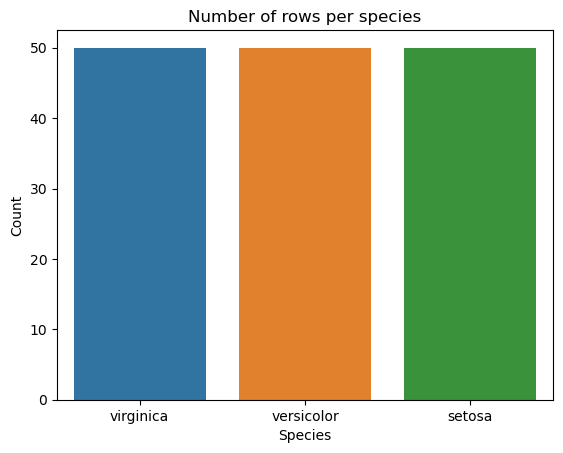

In [46]:
sns.barplot( x = data['species'], y = data['count'])
plt.xlabel('Species')
plt.ylabel('Count')
plt.title('Number of rows per species')

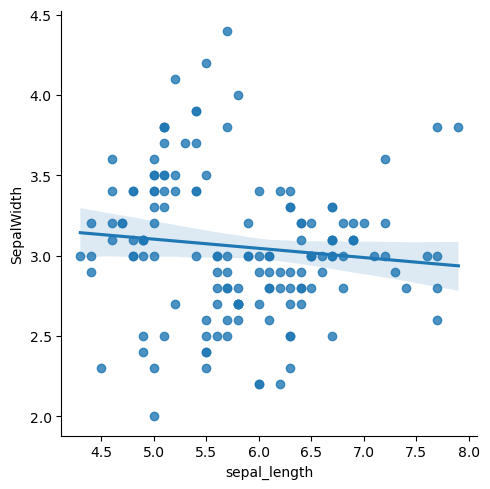

In [47]:
data = df.toPandas()
sns.lmplot(x="sepal_length", y="SepalWidth", data=data)
plt.show()

/tmp/ipykernel_409315/2973381662.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(data.SepalWidth, shade=True)


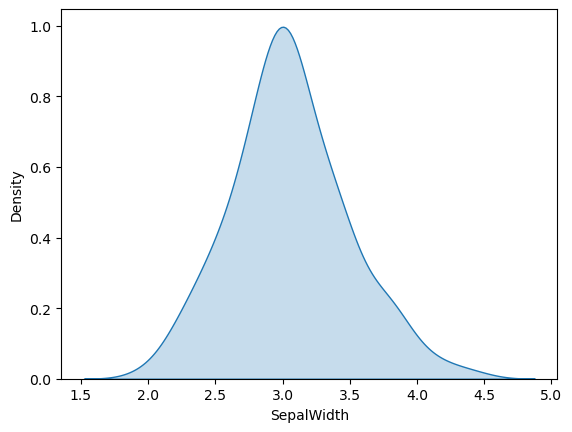

In [48]:
data = df.toPandas()
sns.kdeplot(data.SepalWidth, shade=True)
plt.show()